## Pipeline
    Data Preprocess(Tokenize --> Stopwords Removing --> Lemmatize --> stem)

                            |
                      Generate BOW 
                            
                            |
                 Prepare Train and Test data
                            
                            |
                 Naive Bayes Implementation         
                            
                            |
  performance evaluation(Accuracy score + precision score + recall score + F1 score)

# Naive Bayes Theorem

Bayes theorem is one of the earliest probabilistic inference algorithms developed by Reverend Bayes (which he used to try and infer the existence of God no less) and still performs extremely well for certain use cases.

It's best to understand this theorem using an example. Let's say you are a member of the Secret Service and you have been deployed to protect the Democratic presidential nominee during one of his/her campaign speeches. Being a public event that is open to all, your job is not easy and you have to be on the constant lookout for threats. So one place to start is to put a certain threat-factor for each person. So based on the features of an individual, like the age, sex, and other smaller factors like is the person carrying a bag?, does the person look nervous? etc. you can make a judgement call as to if that person is viable threat.

If an individual ticks all the boxes up to a level where it crosses a threshold of doubt in your mind, you can take action and remove that person from the vicinity. The Bayes theorem works in the same way as we are computing the probability of an event(a person being a threat) based on the probabilities of certain related events(age, sex, presence of bag or not, nervousness etc. of the person).

One thing to consider is the independence of these features amongst each other. For example if a child looks nervous at the event then the likelihood of that person being a threat is not as much as say if it was a grown man who was nervous. To break this down a bit further, here there are two features we are considering, age AND nervousness. Say we look at these features individually, we could design a model that flags ALL persons that are nervous as potential threats. However, it is likely that we will have a lot of false positives as there is a strong chance that minors present at the event will be nervous. Hence by considering the age of a person along with the 'nervousness' feature we would definitely get a more accurate result as to who are potential threats and who aren't.

This is the 'Naive' bit of the theorem where it considers each feature to be independant of each other which may not always be the case and hence that can affect the final judgement.

In short, the Bayes theorem calculates the probability of a certain event happening(in our case, a message being spam) based on the joint probabilistic distributions of certain other events(in our case, a message being classified as spam). We will dive into the workings of the Bayes theorem later in the mission, but first, let us understand the data we are going to work with.

# Bayes Theorem Implementation

Now that we have our dataset in the format that we need, we can move onto the next portion of our mission which is the algorithm we will use to make our predictions to classify a message as spam or not spam. Remember that at the start of the mission we briefly discussed the Bayes theorem but now we shall go into a little more detail. In layman's terms, the Bayes theorem calculates the probability of an event occurring, based on certain other probabilities that are related to the event in question. It is composed of a prior(the probabilities that we are aware of or that is given to us) and the posterior(the probabilities we are looking to compute using the priors).

Let us implement the Bayes Theorem from scratch using a simple example. Let's say we are trying to find the odds of an individual having diabetes, given that he or she was tested for it and got a positive result. In the medical field, such probabilies play a very important role as it usually deals with life and death situatuations.

We assume the following:

P(D) is the probability of a person having Diabetes. It's value is 0.01 or in other words, 1% of the general population has diabetes(Disclaimer: these values are assumptions and are not reflective of any medical study).

P(Pos) is the probability of getting a positive test result.

P(Neg) is the probability of getting a negative test result.

P(Pos|D) is the probability of getting a positive result on a test done for detecting diabetes, given that you have diabetes. This has a value 0.9. In other words the test is correct 90% of the time. This is also called the Sensitivity or True Positive Rate.

P(Neg|~D) is the probability of getting a negative result on a test done for detecting diabetes, given that you do not have diabetes. This also has a value of 0.9 and is therefore correct, 90% of the time. This is also called the Specificity or True Negative Rate.

The Bayes formula is as follows:

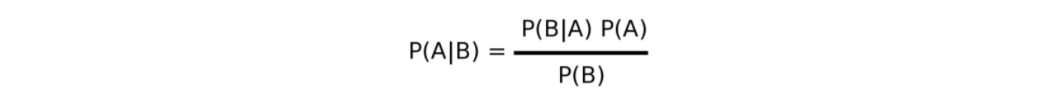

* P(A) is the prior probability of A occuring independantly. In our example this is P(D). This value is given to us.

* P(B) is the prior probability of B occuring independantly. In our example this is P(Pos).

* P(A|B) is the posterior probability that A occurs given B. In our example this is P(D|Pos). That is, the probability of an individual having diabetes, given that, that individual got a positive test result. This is the value that we are looking to calculate.

* P(B|A) is the likelihood probability of B occuring, given A. In our example this is P(Pos|D). This value is given to us.

Putting our values into the formula for Bayes theorem we get:

* P(D|Pos) = (P(D) * P(Pos|D) / P(Pos)

The probability of getting a positive test result P(Pos) can be calulated using the Sensitivity and Specificity as follows:

* P(Pos) = [P(D) * Sensitivity] + [P(~D) * (1-Specificity))]

In [1]:
'''
Instructions:
Calculate probability of getting a positive test result, P(Pos)
'''

# P(D)
p_diabetes = 0.01

# P(~D)
p_no_diabetes = 1 - p_diabetes

# Sensitivity or P(Pos/D)
p_pos_diabetes = 0.9

# Specificity or P(Neg/~D)
p_neg_no_diabetes = 0.9

# P(Pos)
p_pos = (p_diabetes * p_pos_diabetes) + (p_no_diabetes * ( 1 - p_neg_no_diabetes))
print("The probability of getting a positive test result P(Pos) is: {}", format(p_pos))

The probability of getting a positive test result P(Pos) is: {} 0.10799999999999998


### Using all of this information we can calculate our posteriors as follows:

#### The probability of an individual having diabetes, given that, that individual got a positive test result:

P(D/Pos) = (P(D) * Sensitivity)) / P(Pos)

#### The probability of an individual not having diabetes, given that, that individual got a positive test result:

P(~D/Pos) = (P(~D) * (1-Specificity)) / P(Pos)

#### The sum of our posteriors will always equal 1.

In [2]:
'''
Instructions:
Compute the probability of an individual having diabetes, given that, that individual got a positive test result.
In other words, compute P(D|Pos).

The formula is: P(D|Pos) = (P(D) * P(Pos|D) / P(Pos)
'''
p_diabetes_pos = (p_diabetes * p_pos_diabetes) / p_pos
print('Probability of an individual having diabetes, given that that individual got a positive test result is:\
',format(p_diabetes_pos))


Probability of an individual having diabetes, given that that individual got a positive test result is: 0.08333333333333336


In [3]:

'''
Instructions:
Compute the probability of an individual not having diabetes, given that, that individual got a positive test result.
In other words, compute P(~D|Pos).

The formula is: P(~D|Pos) = (P(~D) * P(Pos|~D) / P(Pos)

Note that P(Pos/~D) can be computed as 1 - P(Neg/~D). 

Therefore:
P(Pos/~D) = p_pos_no_diabetes = 1 - 0.9 = 0.1
'''

# P(Pos/~D)
p_pos_no_diabetes = 0.1

# P(~D|Pos)
p_no_diabetes_pos = (p_no_diabetes * p_pos_no_diabetes) / p_pos
print('Probability of an individual not having diabetes, given that that individual got a positive test result is:'\
,p_no_diabetes_pos)

Probability of an individual not having diabetes, given that that individual got a positive test result is: 0.9166666666666669


The analysis shows that even if you get a positive test result, there is only a 8.3% chance that you actually have diabetes and a 91.67% chance that you do not have diabetes. This is of course assuming that only 1% of the entire population has diabetes which of course is only an assumption.

#### What does the term 'Naive' in 'Naive Bayes' mean ?

The term 'Naive' in Naive Bayes comes from the fact that the algorithm considers the features that it is using to make the predictions to be independent of each other, which may not always be the case. So in our Diabetes example, we are considering only one feature, that is the test result. Say we added another feature, 'exercise'. Let's say this feature has a binary value of 0 and 1, where the former signifies that the individual exercises less than or equal to 2 days a week and the latter signifies that the individual exercises greater than or equal to 3 days a week. If we had to use both of these features, namely the test result and the value of the 'exercise' feature, to compute our final probabilities, Bayes' theorem would fail. Naive Bayes' is an extension of Bayes' theorem that assumes that all the features are independent of each other.

# Naive Bayes implementation

Now that you have understood the ins and outs of Bayes Theorem, we will extend it to consider cases where we have more than feature.

Let's say that we have two political parties' candidates, 'Jill Stein' of the Green Party and 'Gary Johnson' of the Libertarian Party and we have the probabilities of each of these candidates saying the words 'freedom', 'immigration' and 'environment' when they give a speech:

* Probability that Jill Stein says 'freedom': 0.1 ---------> P(F|J)
* Probability that Jill Stein says 'immigration': 0.1 -----> P(I|J)
* Probability that Jill Stein says 'environment': 0.8 -----> P(E|J)


* Probability that Gary Johnson says 'freedom': 0.7 -------> P(F|G)
* Probability that Gary Johnson says 'immigration': 0.2 ---> P(I|G)
* Probability that Gary Johnson says 'environment': 0.1 ---> P(E|G)
And let us also assume that the probablility of Jill Stein giving a speech, P(J) is 0.5 and the same for Gary Johnson, P(G) = 0.5.

Given this, what if we had to find the probabilities of Jill Stein saying the words 'freedom' and 'immigration'? This is where the Naive Bayes'theorem comes into play as we are considering two features, 'freedom' and 'immigration'.

Now we are at a place where we can define the formula for the Naive Bayes' theorem:

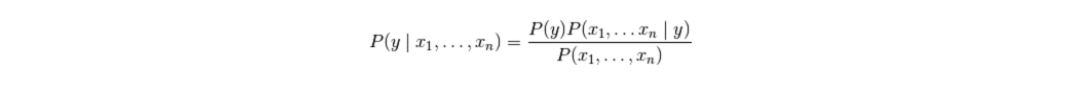

Here, y is the class variable or in our case the name of the candidate and x1 through xn are the feature vectors or in our case the individual words. The theorem makes the assumption that each of the feature vectors or words (xi) are independent of each other.

To break this down, we have to compute the following posterior probabilities:

* P(J|F,I): Probability of Jill Stein saying the words Freedom and Immigration.

Using the formula and our knowledge of Bayes' theorem, we can compute this as follows: 
* P(J|F,I) = (P(J) * P(F|J) * P(I|J)) / P(F,I). Here P(F,I) is the probability of the words 'freedom' and 'immigration' being said in a speech.

* P(G|F,I): Probability of Gary Johnson saying the words Freedom and Immigration.

Using the formula, we can compute this as follows: P(G|F,I) = (P(G) * P(F|G) * P(I|G)) / P(F,I)

In [4]:
'''
Instructions: Compute the probability of the words 'freedom' and 'immigration' being said in a speech, or
P(F,I).

The first step is multiplying the probabilities of Jill Stein giving a speech with her individual 
probabilities of saying the words 'freedom' and 'immigration'. Store this in a variable called p_j_text

The second step is multiplying the probabilities of Gary Johnson giving a speech with his individual 
probabilities of saying the words 'freedom' and 'immigration'. Store this in a variable called p_g_text

The third step is to add both of these probabilities and you will get P(F,I).
'''
# P(J)
p_j = 0.5

# P(F/J)
p_j_f = 0.1

# P(I/J)
p_j_i = 0.1

p_j_text = p_j * p_j_f * p_j_i
print(p_j_text)

0.005000000000000001


In [5]:
# P(G)
p_g = 0.5

# P(F/G)
p_g_f = 0.7

# P(I/G)
p_g_i = 0.2

p_g_text = p_g * p_g_f * p_g_i
print(p_g_text)

0.06999999999999999


In [6]:
p_f_i = p_j_text + p_g_text
print('Probability of words freedom and immigration being said are: ', format(p_f_i))

Probability of words freedom and immigration being said are:  0.075


In [7]:
'''
Instructions:
Compute P(J|F,I) using the formula P(J|F,I) = (P(J) * P(F|J) * P(I|J)) / P(F,I) and store it in a variable p_j_fi
'''

p_j_fi = p_j_text / p_f_i
print('The probability of Jill Stein saying the words Freedom and Immigration: ', format(p_j_fi))

The probability of Jill Stein saying the words Freedom and Immigration:  0.06666666666666668


In [8]:
'''
Instructions:
Compute P(G|F,I) using the formula P(G|F,I) = (P(G) * P(F|G) * P(I|G)) / P(F,I) and store it in a variable p_g_fi
'''

p_g_fi = p_g_text / p_f_i
print('The probability of Gary Johnson saying the words Freedom and Immigration: ', format(p_g_fi))

The probability of Gary Johnson saying the words Freedom and Immigration:  0.9333333333333332


The probability of Gary Johnson saying the words Freedom and Immigration:  0.9333333333333332
And as we can see, just like in the Bayes' theorem case, the sum of our posteriors is equal to 1. Congratulations! You have implemented the Naive Bayes' theorem from scratch. Our analysis shows that there is only a 6.6% chance that Jill Stein of the Green Party uses the words 'freedom' and 'immigration' in her speech as compard the the 93.3% chance for Gary Johnson of the Libertarian party.

Another more generic example of Naive Bayes' in action is as when we search for the term 'Sacramento Kings' in a search engine. In order for us to get the results pertaining to the Scramento Kings NBA basketball team, the search engine needs to be able to associate the two words together and not treat them individually, in which case we would get results of images tagged with 'Sacramento' like pictures of city landscapes and images of 'Kings' which could be pictures of crowns or kings from history when what we are looking to get are images of the basketball team. This is a classic case of the search engine treating the words as independant entities and hence being 'naive' in its approach.

Applying this to our problem of classifying messages as spam, the Naive Bayes algorithm looks at each word individually and not as associated entities with any kind of link between them. In the case of spam detectors, this usually works as there are certain red flag words which can almost guarantee its classification as spam, for example emails with words like 'viagra' are usually classified as spam.

# Step 1 Data Preprocessing

### step 1.1 Load Data

In [9]:
import pandas as pd

df = pd.read_table("SMSSpamCollection",
                   sep = "\t",
                   header = None,
                   names = ["label","sms_message"]
                  )
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# generate label for spam and ham
df["label"] = df.label.map({"ham":0, "spam":1})
print(df.shape)
df.head()

(5572, 2)


,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Step 1.2 Lower Sentences

In [11]:
# Example
# lower case
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']
lower_case_documents = []
for i in documents:
    lower_case_documents.append(i.lower())
print(lower_case_documents)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


### Step 1.3 Remove Punctuations

In [12]:
# remove punctuations
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
print(sans_punctuation_documents)

['hello how are you', 'win money win from home', 'call me now', 'hello call hello you tomorrow']


### Step 1.4 Tokenization

In [13]:
# Tokenization
preprocessed_documents = []
for i in sans_punctuation_documents:
    preprocessed_documents.append(i.split(" "))
print(preprocessed_documents)

[['hello', 'how', 'are', 'you'], ['win', 'money', 'win', 'from', 'home'], ['call', 'me', 'now'], ['hello', 'call', 'hello', 'you', 'tomorrow']]


### Step 1.5 Count Frequency

In [14]:
# Count frequencies
frequency_list = []
import pprint
from collections import Counter

for i in preprocessed_documents:
    frequency_counts = Counter(i)
    frequency_list.append(frequency_counts)
pprint.pprint(frequency_list)

[Counter({'you': 1, 'how': 1, 'hello': 1, 'are': 1}),
 Counter({'win': 2, 'from': 1, 'home': 1, 'money': 1}),
 Counter({'now': 1, 'me': 1, 'call': 1}),
 Counter({'hello': 2, 'you': 1, 'tomorrow': 1, 'call': 1})]


# Step 2 BOW Generation

### Step 2.1 Implement Bag of Words in scikit-learn

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()

In previous step, we implemented a version of the CountVectorizer() method from scratch that entailed cleaning our data first. This cleaning involved converting all of our data to lower case and removing all punctuation marks. CountVectorizer() has certain parameters which take care of these steps for us. They are:

* lowercase = True

The lowercase parameter has a default value of True which converts all of our text to its lower case form.

* token_pattern = (?u)\\b\\w\\w+\\b

The token_pattern parameter has a default regular expression value of (?u)\\b\\w\\w+\\b which ignores all punctuation marks and treats them as delimiters, while accepting alphanumeric strings of length greater than or equal to 2, as individual tokens or words.

* stop_words

The stop_words parameter, if set to english will remove all words from our document set that match a list of English stop words which is defined in scikit-learn. Considering the size of our dataset and the fact that we are dealing with SMS messages and not larger text sources like e-mail, we will not be setting this parameter value.

In [16]:
print(count_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [17]:
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

The get_feature_names() method returns our feature names for this dataset, which is the set of words that make up our vocabulary for 'documents'.



* Instructions: Create a matrix with the rows being each of the 4 documents, and the columns being each word. The corresponding (row, column) value is the frequency of occurrance of that word(in the column) in a particular document(in the row). You can do this using the transform() method and passing in the document data set as the argument. The transform() method returns a matrix of numpy integers, you can convert this to an array using toarray(). Call the array 'doc_array'

In [18]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

Now we have a clean representation of the documents in terms of the frequency distribution of the words in them. To make it easier to understand our next step is to convert this array into a dataframe and name the columns appropriately.

* ##### Instructions: Convert the array we obtained, loaded into 'doc_array', into a dataframe and set the column names to the word names(which you computed earlier using get_feature_names(). Call the dataframe 'frequency_matrix'.

In [19]:
frequency_matrix = pd.DataFrame(doc_array, 
                                columns = count_vector.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


One potential issue that can arise from using this method out of the box is the fact that if our dataset of text is extremely large(say if we have a large collection of news articles or email data), there will be certain values that are more common that others simply due to the structure of the language itself. So for example words like 'is', 'the', 'an', pronouns, grammatical contructs etc could skew our matrix and affect our analyis.

There are a couple of ways to mitigate this. One way is to use the stop_words parameter and set its value to english. This will automatically ignore all words(from our input text) that are found in a built in list of English stop words in scikit-learn.

Another way of mitigating this is by using the tfidf method. This method is out of scope for the context of this lesson.



# Step 3 Prepare Training and Testing Set

### Step 3.1 Training and Testing set

Now that we have understood how to deal with the Bag of Words problem we can get back to our dataset and proceed with our analysis. Our first step in this regard would be to split our dataset into a training and testing set so we can test our model later.

#### Instructions: Split the dataset into a training and testing set by using the train_test_split method in sklearn. Split the data using the following variables:

* X_train is our training data for the 'sms_message' column.
* y_train is our training data for the 'label' column
* X_test is our testing data for the 'sms_message' column.
* y_test is our testing data for the 'label' column Print out the number of rows we have in each our training and testing data.

In [20]:
# split into training and testing sets
# USE from sklearn.model_selection import train_test_split to avoid seeing deprecation warning.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


### Step 3.2 Applying Bag of Words processing to out dataset

Now that we have split the data, our next objective is to follow the steps from Step 2: Bag of words and convert our data into the desired matrix format. To do this we will be using CountVectorizer() as we did before. There are two steps to consider here:

* Firstly, we have to fit our training data (X_train) into CountVectorizer() and return the matrix.
* Secondly, we have to transform our testing data (X_test) to return the matrix.
Note that X_train is our training data for the 'sms_message' column in our dataset and we will be using this to train our model.

X_test is our testing data for the 'sms_message' column and this is the data we will be using(after transformation to a matrix) to make predictions on. We will then compare those predictions with y_test in a later step.

In [21]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into CountVectorizer()
testing_data = count_vector.transform(X_test)


# Step 4 Naive Bayes implementation

Thankfully, sklearn has several Naive Bayes implementations that we can use and so we do not have to do the math from scratch. We will be using sklearns sklearn.naive_bayes method to make predictions on our dataset.

Specifically, we will be using the multinomial Naive Bayes implementation. This particular classifier is suitable for classification with discrete features (such as in our case, word counts for text classification). It takes in integer word counts as its input. On the other hand Gaussian Naive Bayes is better suited for continuous data as it assumes that the input data has a Gaussian(normal) distribution.

In [22]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
predictions = naive_bayes.predict(testing_data)

# Step 5 Evaluating Model

Now that we have made predictions on our test set, our next goal is to evaluate how well our model is doing. There are various mechanisms for doing so, but first let's do quick recap of them.

* #### Accuracy measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points). Larger, better.

* #### Precision tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classification), in other words it is the ratio of

    * #### [True Positives/(True Positives + False Positives)]

* #### Recall(sensitivity) tells us what proportion of messages that actually were spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

    * #### [True Positives/(True Positives + False Negatives)]

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score.

We will be using all 4 metrics to make sure our model does well. For all 4 metrics whose values can range from 0 to 1, having a score as close to 1 as possible is a good indicator of how well our model is doing.

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.9885139985642498
Precision score:  0.9720670391061452
Recall score:  0.9405405405405406
F1 score:  0.9560439560439562


* #### Confusion matrix: 
row represents true label and column represents predicted label. The perfect classification should have true positive labels and true negative labels. So the confusion matrix will be:

        [1203, 0

         0,    174]

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[1203,    5],
       [  11,  174]])

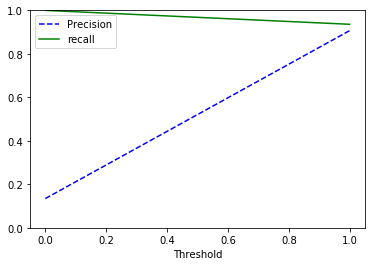

In [27]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

y_scores = cross_val_predict(naive_bayes, training_data, y_train, cv = 3)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


def plot_precision_recall_vs_threshould(precision, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1],"g-", label = "recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "upper left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshould(precisions, recalls, thresholds)
plt.show()

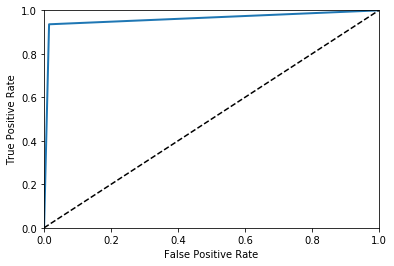

In [28]:
# ROC 
from sklearn.metrics import roc_curve
false_positive_ratio, true_positive_ratio, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1],[0,1],"k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

plot_roc_curve(false_positive_ratio, true_positive_ratio)
plt.show()